Import Dataset

Source Dataset: https://www.kaggle.com/datasets/juliencalenge/felidae-tiger-lion-cheetah-leopard-puma/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Colab Notebooks/dataset-felidae.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


Load & Preprocess Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    "/content/Felidae",
    target_size=(224, 224),  # MobileNetV2 input size
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    "/content/Felidae",
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)


Found 196 images belonging to 5 classes.
Found 47 images belonging to 5 classes.


Build a MobileNetV2 Model

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # 5 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Train the Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.3940 - loss: 1.3645 - val_accuracy: 0.8511 - val_loss: 0.3829
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 560ms/step - accuracy: 0.8633 - loss: 0.4374 - val_accuracy: 0.9149 - val_loss: 0.2878
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 659ms/step - accuracy: 0.8857 - loss: 0.3177 - val_accuracy: 0.9362 - val_loss: 0.1846
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 757ms/step - accuracy: 0.9060 - loss: 0.1856 - val_accuracy: 0.9362 - val_loss: 0.1493
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 570ms/step - accuracy: 0.9414 - loss: 0.1883 - val_accuracy: 0.9362 - val_loss: 0.1539
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 645ms/step - accuracy: 0.9600 - loss: 0.1342 - val_accuracy: 0.9149 - val_loss: 0.2262
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 619ms/step - accuracy: 0.9606 - loss: 0.0994 - val_accuracy: 0.9362 - val_loss: 0.1801
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 635ms/step - accuracy: 0.9830 - loss: 0.1069 - val_accuracy: 0.97

Evaluate and Test the Model

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation accuracy: {accuracy:.2f}")
print(f"Validation loss: {loss:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step - accuracy: 0.8871 - loss: 0.2175
Validation accuracy: 0.91
Validation loss: 0.19


Confusion Matrix

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step


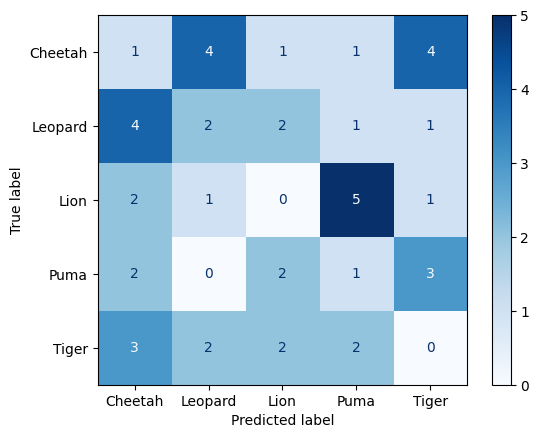

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices)
disp.plot(cmap='Blues')

Clasification Report

In [ ]:

labels = list(val_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

     Cheetah       0.08      0.09      0.09        11
     Leopard       0.22      0.20      0.21        10
        Lion       0.00      0.00      0.00         9
        Puma       0.10      0.12      0.11         8
       Tiger       0.00      0.00      0.00         9

    accuracy                           0.09        47
   macro avg       0.08      0.08      0.08        47
weighted avg       0.08      0.09      0.08        47



Learning Curve

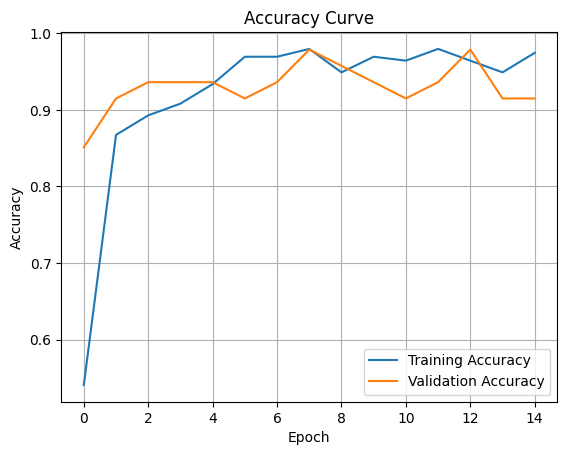

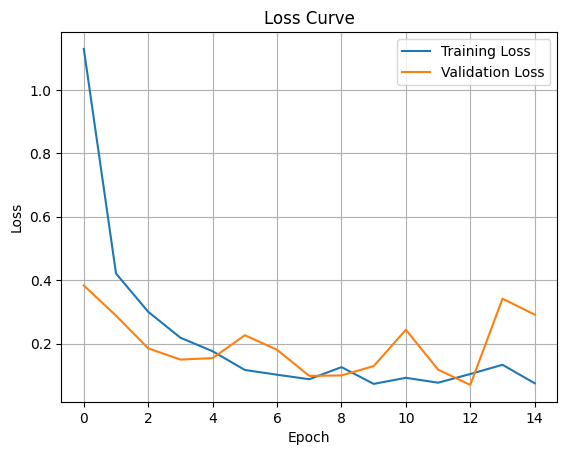

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


---

Upload Custom Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gambar1.jpg to gambar1.jpg


Preprocess Image

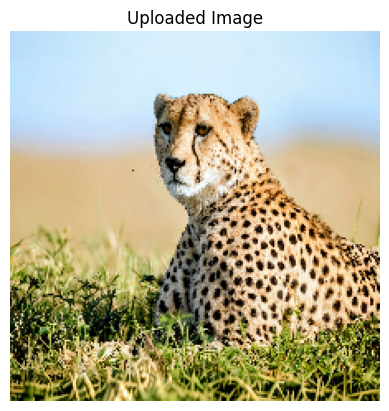

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

# Replace with the filename of your uploaded image
img_path = list(uploaded.keys())[0]

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

Make Prediction and Display Results

In [ ]:
# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

# Map class index to label
class_indices = train_generator.class_indices
labels = dict((v, k) for k, v in class_indices.items())

# Show result
print("Predicted class:", labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Cheetah
